In [ ]:
!pip install matplotlib opencv-python -q
!git clone https://github.com/LilianHollard/LeYOLO.git
%cd LeYOLO
!pip install -e .

In [ ]:
from ultralytics import YOLO
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

In [ ]:
# [NEW] HuggingFace integration!

In [ ]:
model = YOLO.from_pretrained("lhollard/leyolo-medium")
#results = model.val(data="ultralytics/cfg/datasets/coco8.yaml")

This document is a minimal example of LeYOLO fast inference, validation, and export. 

Note: We could only have accomplished this with the excellent work from the Ultralytics team since YOLOv5. 
LeYOLO fully integrates with Ultralytics, and their support and documentation comprehensively guide training, inference, validation, and export mechanisms.
For more details, refer to the Ultralytics documentation: [https://www.ultralytics.com](https://www.ultralytics.com).

In [3]:
def imwrite(img, path):
    if cv2.imwrite(path, img):
        print('Image saved to "{}"'.format(path))
    else:
        print('Failed to save image to "{}"'.format(path))

def imshow(img, figsize=(10, 10), is_bgr=True):
    if is_bgr:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')
    plt.show()

In [4]:
#load model 
model = YOLO("weights/LeYOLOMedium.pt")


image 1/1 C:\Users\lhollard\Desktop\ultralytics\ultralytics\data\images\cat.jpg: 448x640 1 cat, 84.0ms
Speed: 1.0ms preprocess, 84.0ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)


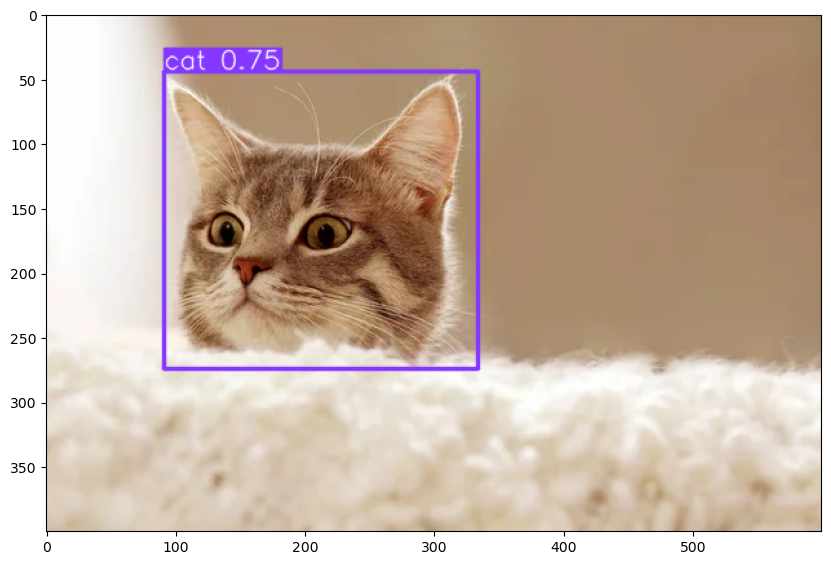

In [5]:
results = model("ultralytics/data/images/cat.jpg")
img = results[0].plot()
imshow(img)


image 1/1 C:\Users\lhollard\Desktop\ultralytics\ultralytics\data\images\tennis.jpg: 640x512 16 persons, 1 tennis racket, 1 chair, 1 potted plant, 79.0ms
Speed: 2.0ms preprocess, 79.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


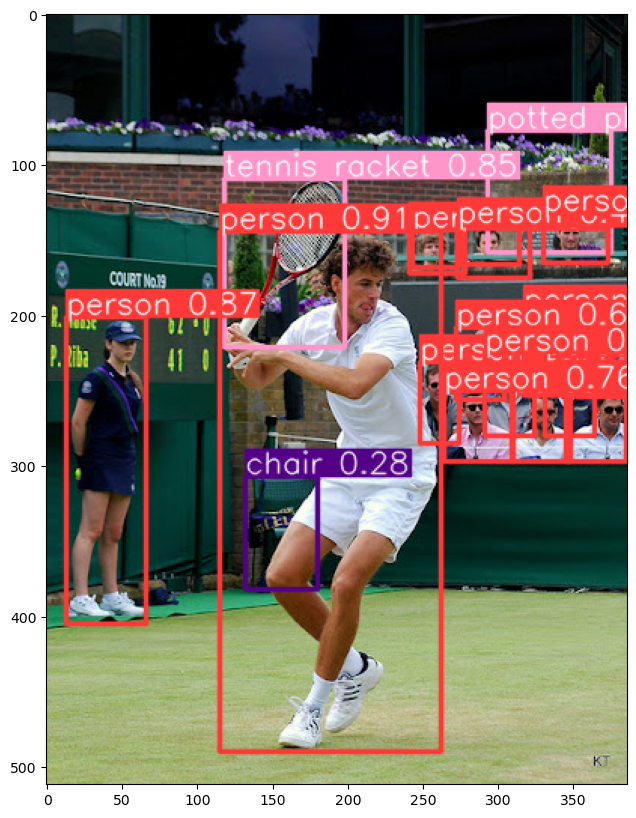

In [6]:
results = model("ultralytics/data/images/tennis.jpg")
img = results[0].plot()
imshow(img)

In [19]:
#load model 
model = YOLO("weights/LeYOLONano.pt")
res = model.train(data="coco8.yaml", epochs=2)

New https://pypi.org/project/ultralytics/8.2.35 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.4 🚀 Python-3.11.7 torch-2.3.1 CUDA:0 (NVIDIA RTX A3000 12GB Laptop GPU, 12288MiB)
engine\trainer: task=detect, mode=train, model=weights/LeYOLONano.pt, data=coco8.yaml, epochs=2, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train40, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning C:\Users\lhollard\Desktop\ultralytics\datasets\coco8\labels\train.cache... 4 images, 0 backgrounds, 0 c

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\lhollard\Desktop\ultralytics\datasets\coco8\labels\val.cache... 4 images, 0 backgrounds, 0 corru


Plotting labels to runs\detect\train40\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 94 weight(decay=0.0), 101 weight(decay=0.0005), 174 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train40
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2      1.17G     0.9714      1.629      1.278         13        640: 100%|██████████| 1/1 [00:19<00:00, 19.44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17      0.603       0.95      0.912      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2      1.16G      1.142      2.248      1.542         13        640: 100%|██████████| 1/1 [00:00<00:00, 10.10
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17      0.601       0.95      0.912      0.602



2 epochs completed in 0.006 hours.
Optimizer stripped from runs\detect\train40\weights\last.pt, 2.6MB
Optimizer stripped from runs\detect\train40\weights\best.pt, 2.6MB

Validating runs\detect\train40\weights\best.pt...
Ultralytics YOLOv8.1.4 🚀 Python-3.11.7 torch-2.3.1 CUDA:0 (NVIDIA RTX A3000 12GB Laptop GPU, 12288MiB)
installed
FLOP(G):  2.6411264
cc_x6 summary: 364 layers, 1119040 parameters, 0 gradients, 2.641126 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          4         17      0.601       0.95      0.911      0.626
                person          4         10      0.311        0.7      0.494      0.274
                   dog          4          1       0.87          1      0.995      0.298
                 horse          4          2      0.675          1      0.995      0.747
              elephant          4          2      0.552          1      0.995      0.547
              umbrella          4          1      0.535          1      0.995      0.995
          potted plant          4          1      0.661          1      0.995      0.895
Speed: 0.5ms preprocess, 4.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\train40


Validation of LeYOLOSmall with pytorch model, trained at 640p, validated at 480p.

Installing pycocotools for MSCOCO VALIDATION results within YOLOv8 validation script might exhibit slightly different results

In [17]:
results = model.val(data="coco8.yaml", imgsz=480)

Ultralytics YOLOv8.1.4 🚀 Python-3.11.7 torch-2.3.1 CUDA:0 (NVIDIA RTX A3000 12GB Laptop GPU, 12288MiB)
installed
FLOP(G):  2.6411264
cc_x6 summary: 364 layers, 1119040 parameters, 0 gradients, 2.641126 GFLOPs


val: Scanning C:\Users\lhollard\Desktop\ultralytics\datasets\coco8\labels\val.cache... 4 images, 0 backgrounds, 0 corru
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<0


                   all          4         17      0.605      0.763      0.903      0.538
                person          4         10       0.42      0.581      0.443      0.236
                   dog          4          1      0.851          1      0.995      0.597
                 horse          4          2      0.518          1      0.995      0.796
              elephant          4          2      0.294          1      0.995      0.402
              umbrella          4          1      0.548          1      0.995      0.995
          potted plant          4          1          1          0      0.995      0.199
Speed: 5.7ms preprocess, 48.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\train392


In [18]:
#export format onnx -> from LeYOLOSmall trained at 640 to LeYOLOSmall@480p
model.export(format="onnx", imgsz=480)

Ultralytics YOLOv8.1.4 🚀 Python-3.11.7 torch-2.3.1 CPU (12th Gen Intel Core(TM) i7-12850HX)
installed
FLOP(G):  2.6411264
cc_x6 summary: 364 layers, 1119040 parameters, 0 gradients, 2.641126 GFLOPs

PyTorch: starting from 'runs\detect\train39\weights\best.pt' with input shape (1, 3, 480, 480) BCHW and output shape(s) (1, 84, 4725) (2.5 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 1.3s, saved as 'runs\detect\train39\weights\best.onnx' (4.3 MB)

Export complete (3.5s)
Results saved to C:\Users\lhollard\Desktop\ultralytics\runs\detect\train39\weights
Predict:         yolo predict task=detect model=runs\detect\train39\weights\best.onnx imgsz=480  
Validate:        yolo val task=detect model=runs\detect\train39\weights\best.onnx imgsz=480 data=C:\Users\lhollard\Desktop\ultralytics\ultralytics\cfg\datasets\coco8.yaml  
Visualize:       https://netron.app


'runs\\detect\\train39\\weights\\best.onnx'